In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [ ]:
data=pd.read_csv("marketing_AB.csv")

In [ ]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#checking if we have any duplicates with rescpect to user Id
data.duplicated(subset='user id').sum()

0

In [ ]:
data.drop(["Unnamed: 0", "user id"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
#check if the categorical variables have appropriate number of levels
data_cate=data[["test group",	"converted", "most ads day",	"most ads hour"]]
data_cate.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [ ]:
#check if the categorical variables have appropriate levels
for i in data_cate.columns:
  print(i.upper(),":",data_cate[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# **Univariate analysis**

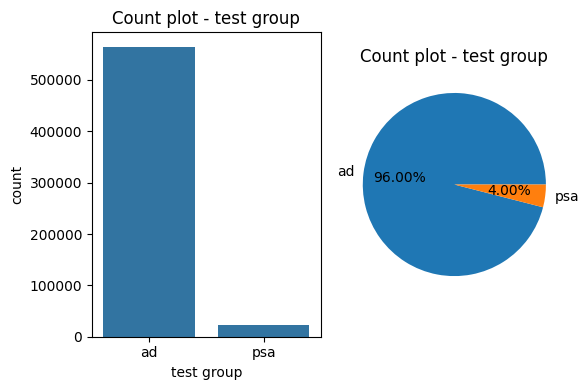

In [ ]:
Variable='test group'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate)
plt.title(f'Count plot - {Variable}')

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts, labels=counts.index,autopct='%0.2f%%')
plt.title(f'Count plot - {Variable}')

#Adjust layout
plt.tight_layout()



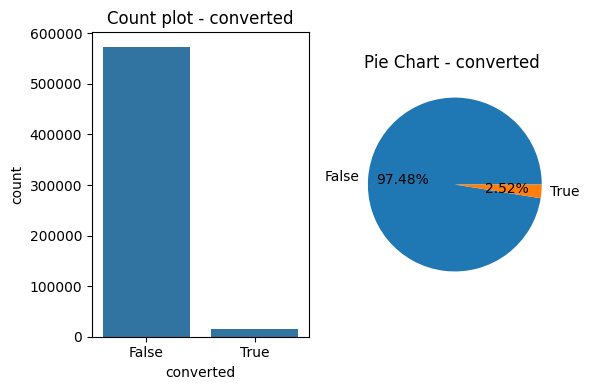

In [ ]:
Variable = 'converted'

plt.figure(figsize = (6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate)
plt.title(f'Count plot - {Variable}')

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()

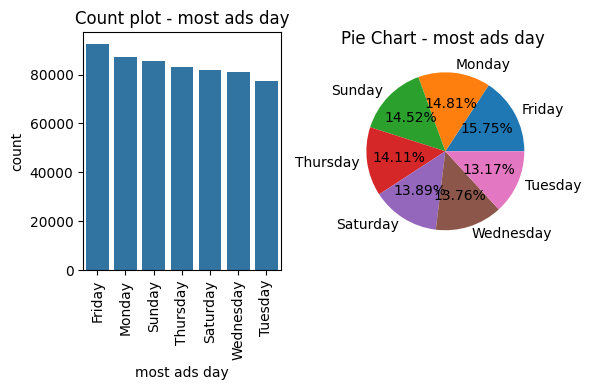

In [ ]:
Variable = 'most ads day'

plt.figure(figsize = (6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate , order=data_cate['most ads day'].value_counts().index)
plt.title(f'Count plot - {Variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()

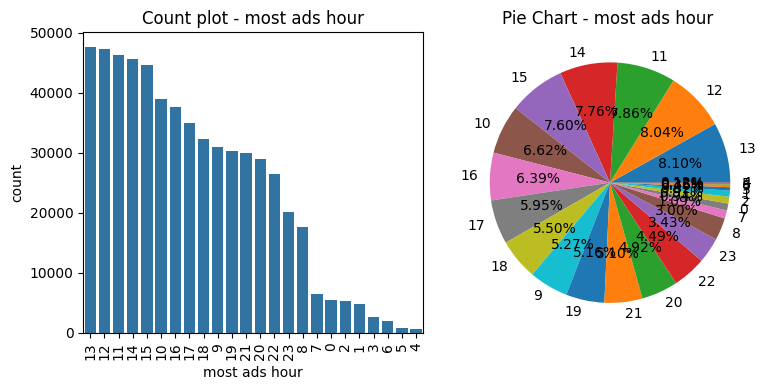

In [ ]:
Variable = 'most ads hour'

plt.figure(figsize = (8,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=Variable,data=data_cate , order=data_cate['most ads hour'].value_counts().index)
plt.title(f'Count plot - {Variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=data_cate[Variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {Variable} ')

#adjust layout
plt.tight_layout()

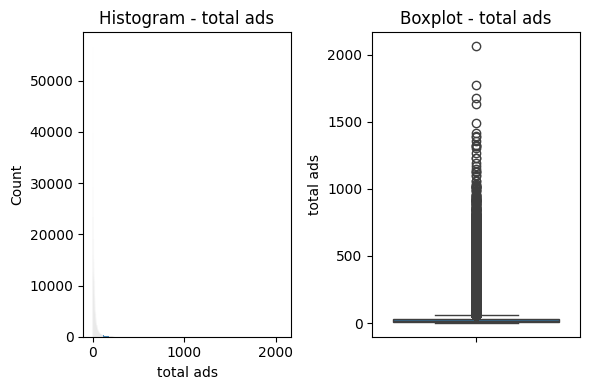

In [ ]:
Variable='total ads'

plt.figure(figsize=(6, 4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=Variable,data=data)
plt.title(f'Histogram - {Variable}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=Variable,data=data)
plt.title(f'Boxplot - {Variable}')

#Adjust layout
plt.tight_layout()

In [ ]:
#Lets check the descriptive stats of this feature
data['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

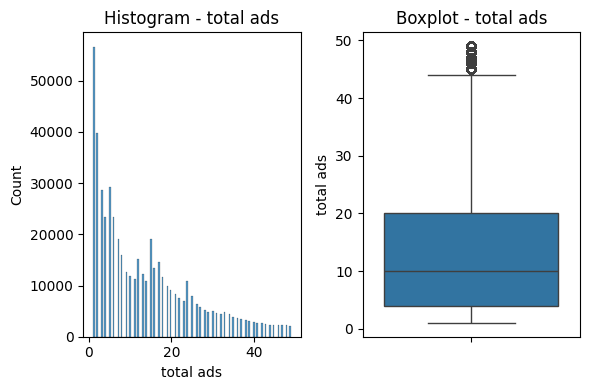

In [ ]:
Variable='total ads'

plt.figure(figsize=(6, 4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=Variable,data=data[data['total ads']<50])
plt.title(f'Histogram - {Variable}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=Variable,data=data[data['total ads']<50])
plt.title(f'Boxplot - {Variable}')

#Adjust layout
plt.tight_layout()

# **Bivariate analysis**

In [ ]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
ct_conversion_test_group=pd.crosstab(data['test group'],data['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


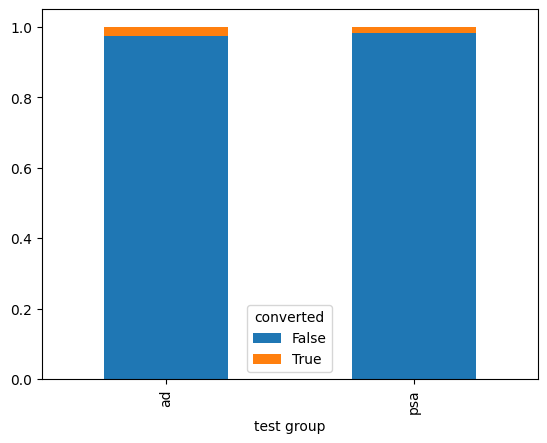

In [ ]:
ct_conversion_test_group.plot.bar(stacked=True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


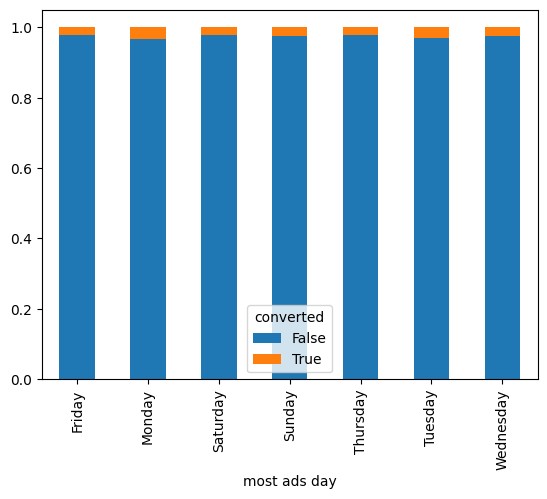

In [ ]:
ct_conversion_day=pd.crosstab(data['most ads day'],data['converted'],normalize='index')
print(ct_conversion_day.sort_values(by=True,ascending=False))
ct_conversion_day.plot.bar(stacked=True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


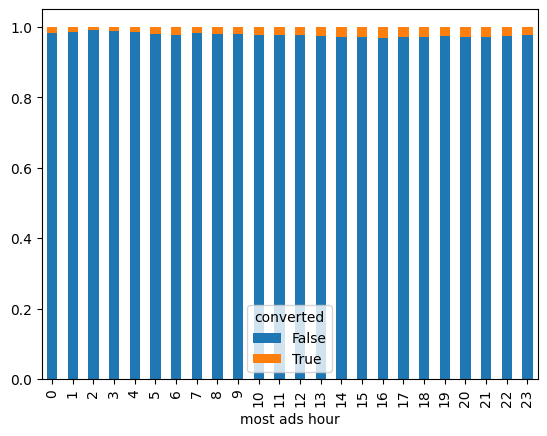

In [ ]:
ct_conversion_hour=pd.crosstab(data['most ads hour'],data['converted'],normalize='index')
print(ct_conversion_hour.sort_values(by=True,ascending=False))
ct_conversion_hour.plot.bar(stacked=True);

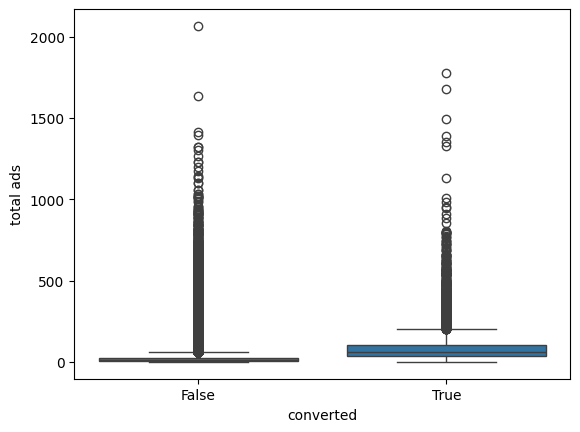

In [ ]:
sns.boxplot(x='converted',y='total ads',data=data);

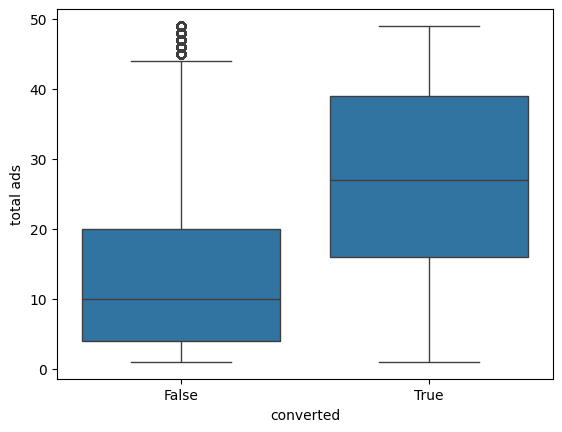

In [ ]:
sns.boxplot(x='converted',y='total ads',data=data[data['total ads']<50]);

# **Statistical Testing

In [ ]:
from scipy.stats import chi2_contingency
alpha=0.05
for Variable in data_cate.columns:
  if Variable != 'converted':
    #creating a contingency table(cross_tabulation)
    contingency_table=pd.crosstab(data_cate[Variable],data_cate['converted'])

    #perform chi-squared test
    chi2, p, _, _ =chi2_contingency(contingency_table)

    #Display the result
    print(f"\nChi-squared test for {Variable} vs. converted")
    print(f"Chi-squared value: {chi2}")
    print(f"p-value: {p}")

    #checking the significance
    if p < alpha:
      print(f"The difference in conversion rates across {Variable} is statistically significant.")
    else:
      print(f"There is no significant difference in conversion rates across {Variable}.")



Chi-squared test for test group vs. converted
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [ ]:
data_cate.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#1 checking assumtions
#Normality assumption
shapiro_stat_true, shapiro_p_value_true=shapiro(data[data['converted'] == True ]['total ads'])
shapiro_stat_false, shapiro_p_value_false=shapiro(data[data['converted'] == False ]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#Equality of various assumptions
levene_stat,levene_p_value=levene(data[data['converted']]['total ads'],data[~data['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [ ]:
#2 perform a suitable test
alpha=0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #assumption net -use t-test for means
  t_stat,t_p_value= ttest_ind(data[data['converted']]['total ads'],data[~data['converted']]['total ads'])
  print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
  #assumption not net -use Mann-Whitney U test for medians
  u_stat,u_p_value=mannwhitneyu(data[data['converted']]['total ads'],data[~data['converted']]['total ads'])
  print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0
